In [ ]:
######################################################################################################################

In [ ]:
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()
df = spark.read.csv("./train-cleaned/*.csv", header=True)
df.printSchema()

In [ ]:
df = df.withColumn("pickup_datetime", expr("replace(pickup_datetime, 'T', ' ')"))
df = df.withColumn("pickup_datetime", expr("replace(pickup_datetime, '.000Z', '')"))
df = df.withColumn("dropoff_datetime", expr("replace(dropoff_datetime, 'T', ' ')"))
df = df.withColumn("dropoff_datetime", expr("replace(dropoff_datetime, '.000Z', '')"))

import nbimporter
from EDA import convert_datatype

df = convert_datatype(df)

for col in df.dtypes:
    print(col[0]+" , "+col[1])

In [ ]:
# Now start creating plots
import matplotlib.pyplot as plt

distance = df.toPandas()['distance'].values;
trip_duration = df.toPandas()['trip_duration'].values;


Text(0, 0.5, 'time')

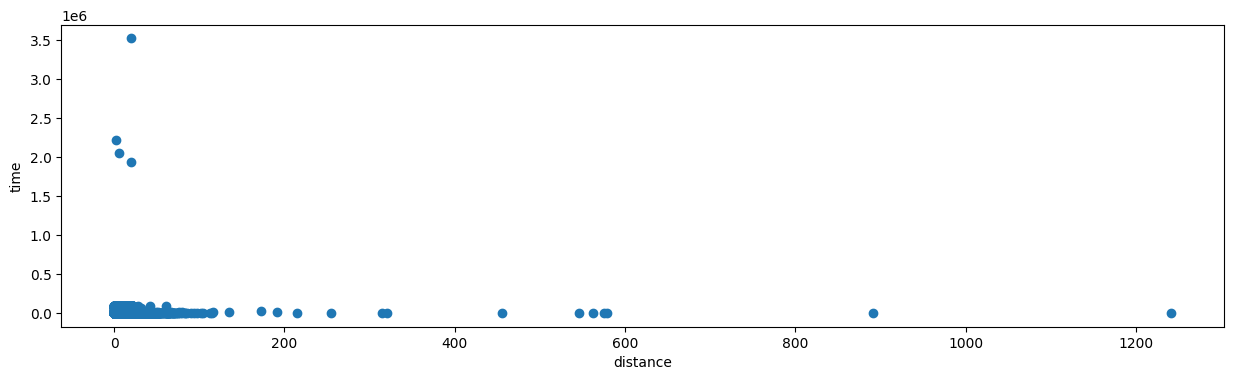

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(15, 4), dpi=100)


plt.scatter(distance, trip_duration)
plt.xlabel("distance")
plt.ylabel("time")

In [ ]:
#df.agg({'distance': 'min'}).show()
#df.agg({'distance': 'max'}).show()
#df.agg({'distance': 'avg'}).show()
#df.agg({'trip_duration': 'min'}).show()
#df.agg({'trip_duration': 'max'}).show()
#df.agg({'trip_duration': 'avg'}).show()

# distance:  min: 4.2417497E-4   max: 1240.9087   avg: 3.45
# time:   min: 1    max:  3526282   average: 961  0.500000

Text(0, 0.5, 'log time')

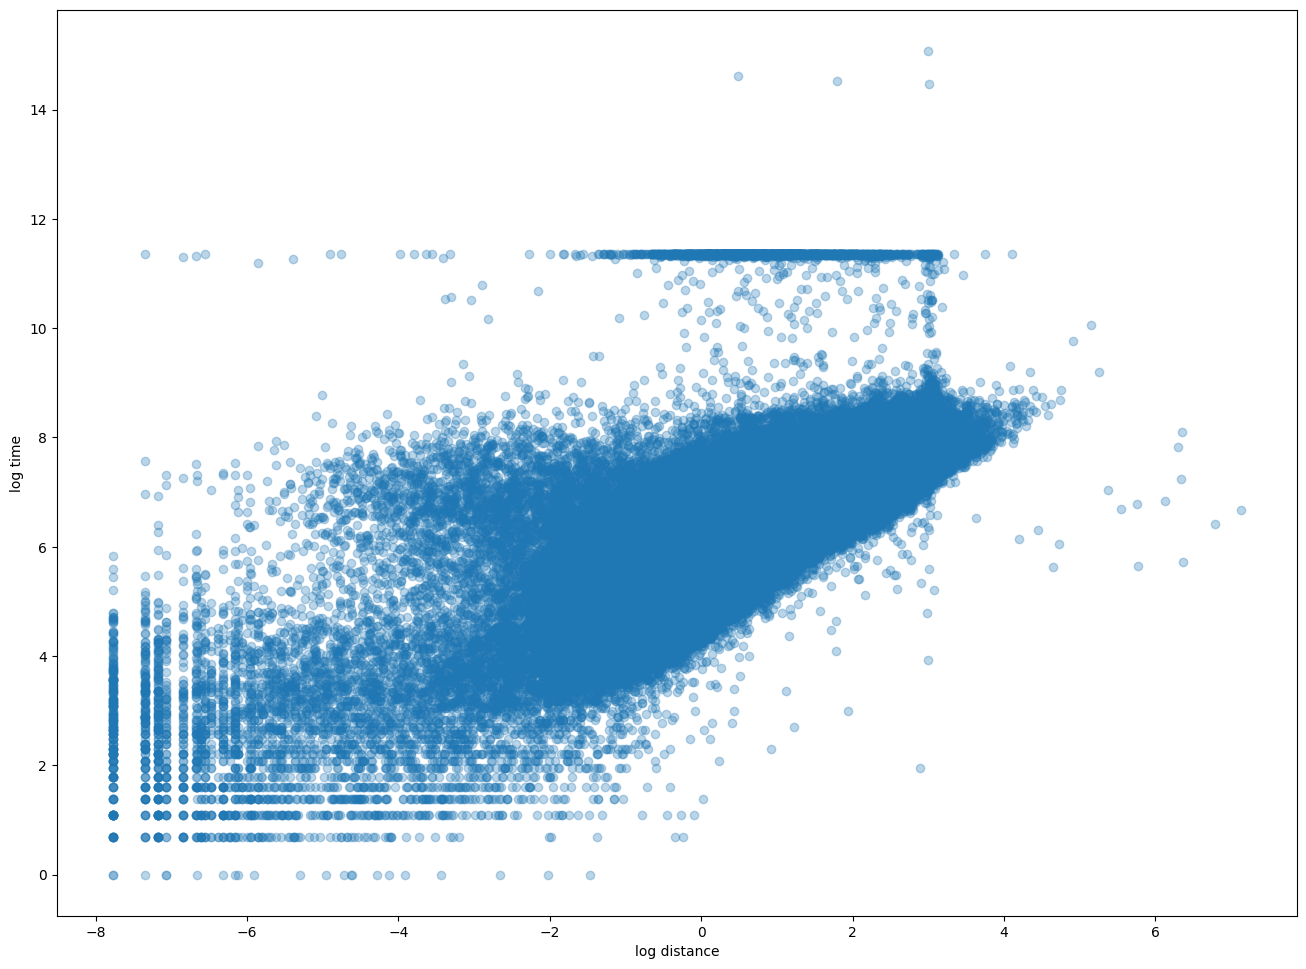

In [ ]:
import numpy as np
figure(figsize=(16, 12), dpi=100)
plt.scatter(np.log(distance), np.log(trip_duration), alpha=0.3)
plt.xlabel("log distance")
plt.ylabel("log time")

In [ ]:
# To remove the outliers, make sure time < 500000. Actually, make sure time is less than 3 hours
# to remove the outliers, make sure distance < 200
# 10800 seconds = 3 hours
df = df.filter((df.trip_duration < 10800) & (df.distance < 200))

distance_filtered = df.toPandas()['distance']
trip_duration_filtered = df.toPandas()['trip_duration']

Text(0, 0.5, 'time')

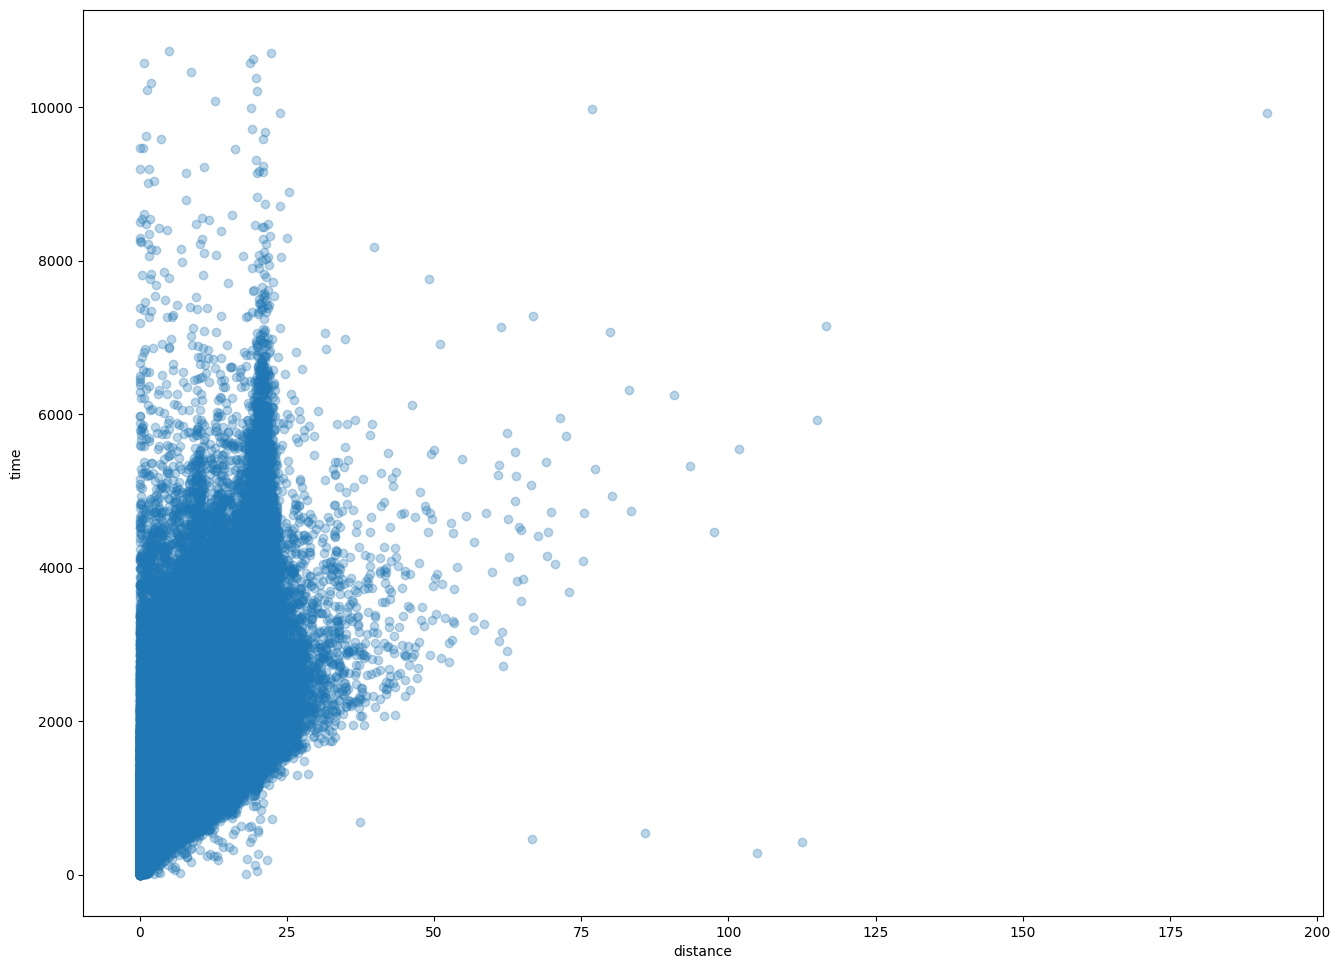

In [ ]:
figure(figsize=(16, 12), dpi=100)
plt.scatter(distance_filtered, trip_duration_filtered, alpha=0.3)
plt.xlabel("distance")
plt.ylabel("time")

#plt.scatter(distance,trip_duration, 'o', ms=14, markerfacecolor="None",markeredgecolor='red', markeredgewidth=5)

Text(0, 0.5, 'time')

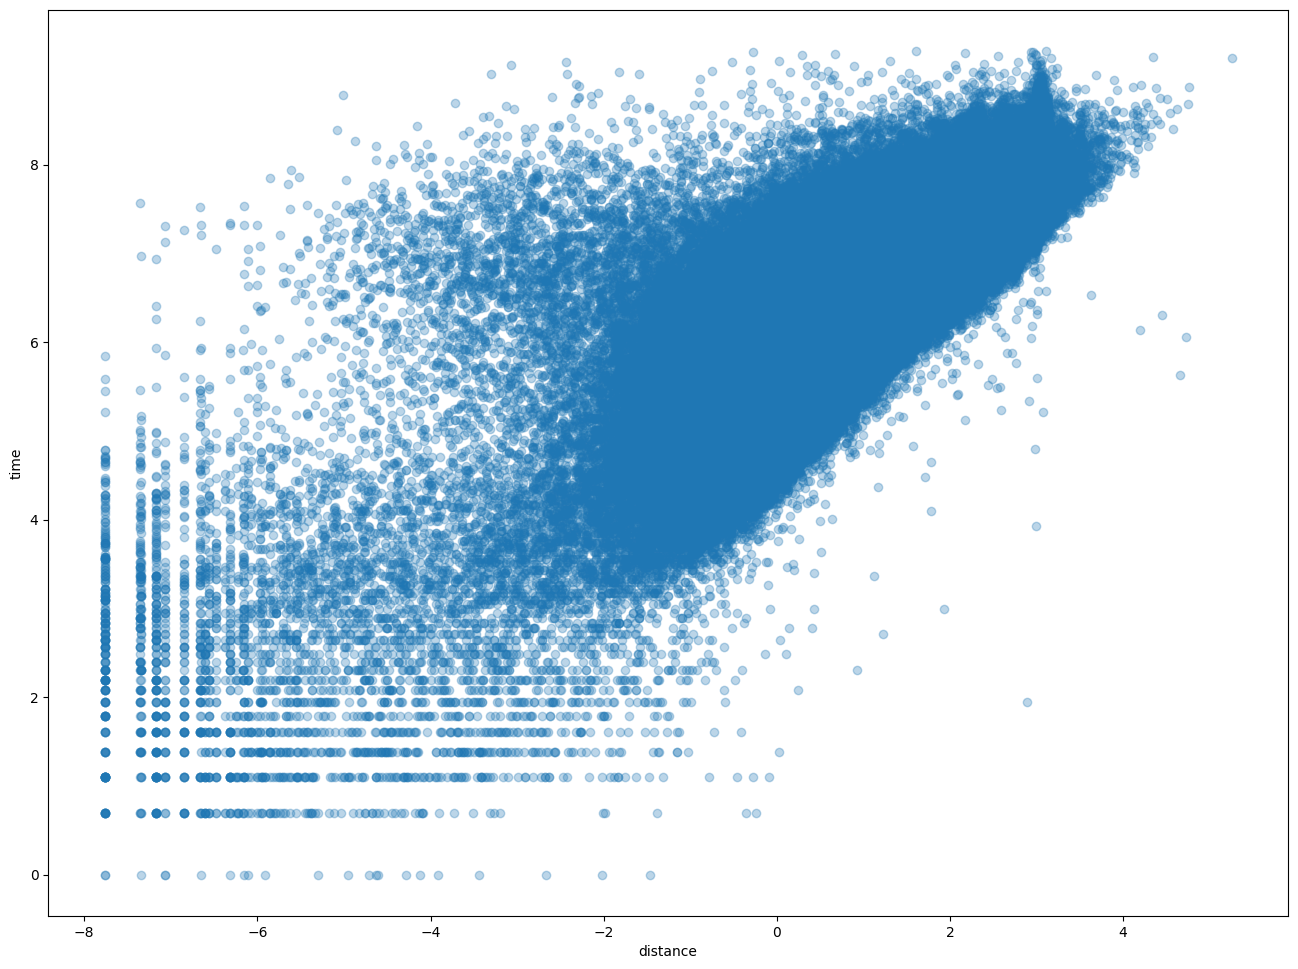

In [ ]:
figure(figsize=(16, 12), dpi=100)
plt.scatter(np.log(distance_filtered), np.log(trip_duration_filtered), alpha=0.3)
plt.xlabel("distance")
plt.ylabel("time")

In [ ]:
# Now get mean trip duration for each day of the week
from pyspark.sql.functions import col
import calendar


df_day = df.select(col("pickup_datetime"),col("trip_duration"), col("distance"))
df_day = df_day.withColumn('day_name', date_format(col("pickup_datetime"), "E"))

df_avg_time = df_day.groupBy("day_name").mean("trip_duration")

df_avg_time.show()

+--------+------------------+
|day_name|avg(trip_duration)|
+--------+------------------+
|     Sun| 763.9758223540254|
|     Mon| 811.3824207647343|
|     Thu| 898.5509696119252|
|     Sat| 779.5653840899777|
|     Wed|  880.655418528334|
|     Tue| 856.2166636085475|
|     Fri| 868.1593633026202|
+--------+------------------+



<Figure size 1600x1200 with 0 Axes>

Text(0, 0.5, 'Mean Duration')

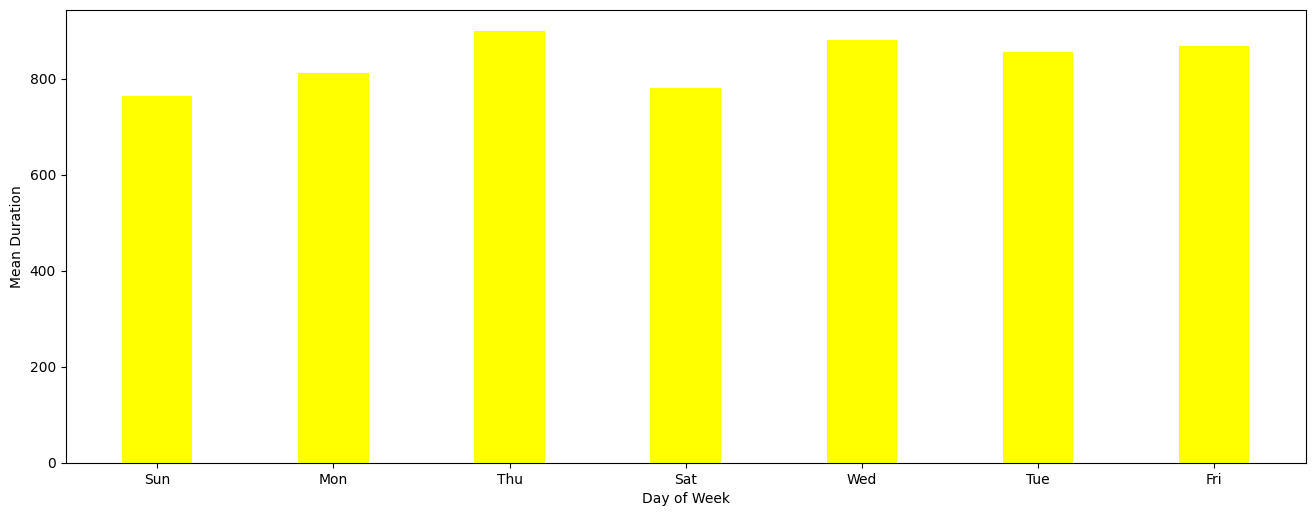

In [ ]:
figure(figsize=(16, 6), dpi=100)
x = df_avg_time.toPandas()['day_name'].values;
y = df_avg_time.toPandas()['avg(trip_duration)'].values
plt.bar(x, y, color ='yellow',width = 0.4)
plt.xlabel('Day of Week')
plt.ylabel('Mean Duration')


Ideas:

    Some kind of a heatmap
    Scatterplot of distance over duration
    Weekday-weekend plot of distance over duration
    Average trip duration for each day of the week
    Average distance on sunday and number (average, total) of trips on sunday
    

Things that need to be done:

    Approximate distance between geographic coordinates in meters
    Why do we have negative distance?

